# DATA VISUALIZATION ON  EARTHQUAKES

In [2]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
data = pd.read_csv('D:\\DATASCIENCE\\data\\all_month.csv')
data.head(5)


time   latitude  longitude   depth   mag magType   nst  \
0  2023-05-04T22:50:05.688Z  60.997400  -153.1646  174.40  1.60      ml   NaN   
1  2023-05-04T22:41:22.125Z  61.800400  -150.8600   65.90  1.10      ml   NaN   
2  2023-05-04T22:40:59.700Z  44.794833  -110.8425    4.68  1.68      ml  13.0   
3  2023-05-04T22:20:35.135Z  -8.300900   160.2452   10.00  5.10      mb  76.0   
4  2023-05-04T22:11:12.189Z  60.989800  -151.2531   61.80  1.40      ml   NaN   

     gap      dmin   rms  ...                   updated  \
0    NaN       NaN  0.77  ...  2023-05-04T22:51:55.739Z   
1    NaN       NaN  0.23  ...  2023-05-04T22:42:50.773Z   
2  107.0  0.008645  0.16  ...  2023-05-04T22:58:59.330Z   
3   67.0  9.010000  0.86  ...  2023-05-04T22:40:34.040Z   
4    NaN       NaN  0.46  ...  2023-05-04T22:12:58.094Z   

                               place        type horizontalError depthError  \
0      107 km WNW of Nikiski, Alaska  earthquake             NaN      0.700   
1       34 km NNW of Susitna, Alaska  earthquake             NaN      0.800   
2      23 km SSW of Mammoth, Wyoming  earthquake            0.40      0.430   
3  71 km NW of Auki, Solomon Islands  earthquake            9.38      1.867   
4         10 km SW of Tyonek, Alaska  earthquake             NaN      0.700   

   magError  magNst     status  locationSource magSource  
0       NaN     NaN  automatic              ak        ak  
1       NaN     NaN  automatic              ak        ak  
2     0.516     3.0   reviewed              uu        uu  
3     0.047   145.0   reviewed              us        us  
4       NaN     NaN  automatic              ak        ak  

[5 rows x 22 columns]

In [5]:
data.describe()

latitude     longitude         depth           mag          nst  \
count  12250.000000  12250.000000  12250.000000  12250.000000  8762.000000   
mean      42.190551   -121.920189     23.560570      1.483732    21.697329   
std       18.855335     61.952070     51.813834      1.174933    21.237449   
min      -65.210500   -179.979400     -3.440000     -1.370000     2.000000   
25%       33.981500   -154.065225      2.410000      0.790000     8.000000   
50%       38.855833   -122.854583      7.840575      1.300000    15.000000   
75%       58.262833   -116.725000     18.300000      1.910000    28.000000   
max       86.593900    179.991500    649.160000      7.100000   247.000000   

               gap         dmin           rms  horizontalError    depthError  \
count  8762.000000  6535.000000  12250.000000      8043.000000  12250.000000   
mean    122.515377     0.542308      0.298974         1.476321      1.847593   
std      64.301034     1.969173      0.273497         2.780848      4.464015   
min      10.000000     0.000000      0.000000         0.060000      0.000000   
25%      70.000000     0.015220      0.090000         0.270000      0.400000   
50%     109.000000     0.060160      0.180000         0.440000      0.700000   
75%     164.000000     0.176183      0.490000         0.810000      1.330000   
max     360.000000    41.439000      2.050000        24.250000    137.000000   

          magError       magNst  
count  8736.000000  8757.000000  
mean      0.240078    16.206578  
std       0.328466    27.375544  
min       0.000000     0.000000  
25%       0.115243     5.000000  
50%       0.177000     9.000000  
75%       0.250000    18.000000  
max       5.530000   814.000000

In [9]:
#Check if there is any missing values or outliers in the dataset
df =data.isna().sum()
df

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3488
gap                3488
dmin               5715
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    4207
depthError            0
magError           3514
magNst             3493
status                0
locationSource        0
magSource             0
dtype: int64

In [15]:
# converting time column to datetime
data['time']=pd.to_datetime(data['time'])
data.head(10)

time   latitude   longitude   depth   mag  \
0 2023-05-04 22:50:05.688000+00:00  60.997400 -153.164600  174.40  1.60   
1 2023-05-04 22:41:22.125000+00:00  61.800400 -150.860000   65.90  1.10   
2 2023-05-04 22:40:59.700000+00:00  44.794833 -110.842500    4.68  1.68   
3 2023-05-04 22:20:35.135000+00:00  -8.300900  160.245200   10.00  5.10   
4 2023-05-04 22:11:12.189000+00:00  60.989800 -151.253100   61.80  1.40   
5 2023-05-04 21:58:24.300000+00:00  38.808834 -122.775002    1.18  0.78   
6 2023-05-04 21:46:15.790000+00:00  33.698500 -117.425333   11.81  1.26   
7 2023-05-04 21:42:05.650000+00:00  33.865833 -116.847500   16.42  1.31   
8 2023-05-04 21:40:17.040000+00:00  38.833168 -122.815666    1.86  1.07   
9 2023-05-04 21:22:10.740000+00:00  33.835333 -117.494000    1.28  1.37   

  magType   nst    gap      dmin   rms  ...                   updated  \
0      ml   NaN    NaN       NaN  0.77  ...  2023-05-04T22:51:55.739Z   
1      ml   NaN    NaN       NaN  0.23  ...  2023-05-04T22:42:50.773Z   
2      ml  13.0  107.0  0.008645  0.16  ...  2023-05-04T22:58:59.330Z   
3      mb  76.0   67.0  9.010000  0.86  ...  2023-05-04T22:40:34.040Z   
4      ml   NaN    NaN       NaN  0.46  ...  2023-05-04T22:12:58.094Z   
5      md   8.0  113.0  0.006264  0.01  ...  2023-05-04T22:39:13.463Z   
6      ml  18.0   57.0  0.049300  0.27  ...  2023-05-04T22:44:06.915Z   
7      ml  40.0   60.0  0.052680  0.26  ...  2023-05-04T21:45:45.387Z   
8      md  22.0   55.0  0.010690  0.02  ...  2023-05-04T22:19:12.352Z   
9      ml  13.0   95.0  0.044520  0.28  ...  2023-05-04T21:25:47.247Z   

                               place          type horizontalError depthError  \
0      107 km WNW of Nikiski, Alaska    earthquake             NaN      0.700   
1       34 km NNW of Susitna, Alaska    earthquake             NaN      0.800   
2      23 km SSW of Mammoth, Wyoming    earthquake            0.40      0.430   
3  71 km NW of Auki, Solomon Islands    earthquake            9.38      1.867   
4         10 km SW of Tyonek, Alaska    earthquake             NaN      0.700   
5         4km NNW of The Geysers, CA    earthquake            0.45      0.790   
6      10km WNW of Lake Elsinore, CA    earthquake            0.51      0.760   
7             7km SSE of Banning, CA    earthquake            0.42      0.850   
8          8km NW of The Geysers, CA    earthquake            0.19      0.510   
9        5km SSE of Home Gardens, CA  quarry blast            0.61      0.920   

   magError  magNst     status  locationSource magSource  
0       NaN     NaN  automatic              ak        ak  
1       NaN     NaN  automatic              ak        ak  
2     0.516     3.0   reviewed              uu        uu  
3     0.047   145.0   reviewed              us        us  
4       NaN     NaN  automatic              ak        ak  
5     0.060    10.0  automatic              nc        nc  
6     0.251    23.0  automatic              ci        ci  
7     0.200    27.0  automatic              ci        ci  
8     0.140    23.0  automatic              nc        nc  
9     0.308    25.0  automatic              ci        ci  

[10 rows x 22 columns]

In [16]:
#getting 1 day data
day = ((data['time']>='2023-05-01') & (data['time']<'2023-05-02'))
df=data.loc[day]
df

time   latitude   longitude    depth   mag magType  \
826   2023-05-01T23:55:21.200Z  38.819832 -122.823166    2.390  0.77      md   
827   2023-05-01T23:53:27.300Z  38.899333 -123.659500    9.030  1.86      md   
828   2023-05-01T23:48:28.040Z  46.557500 -121.759000   -2.310  0.54      md   
829   2023-05-01T23:44:09.286Z -17.632000  -69.699900  151.601  4.10      mb   
830   2023-05-01T23:33:53.194Z  60.448100 -143.696800   16.100  1.70      ml   
...                        ...        ...         ...      ...   ...     ...   
1137  2023-05-01T00:09:53.680Z  46.009833 -111.070500   11.010  0.54      ml   
1138  2023-05-01T00:07:41.537Z  62.364100 -148.987400    9.800  1.00      ml   
1139  2023-05-01T00:06:42.140Z  36.796833 -121.521667    5.200  1.25      md   
1140  2023-05-01T00:04:45.735Z  63.157300 -150.916600  124.600  1.50      ml   
1141  2023-05-01T00:02:03.626Z  63.269600 -151.722900    0.300  0.80      ml   

       nst    gap      dmin   rms  ...                   updated  \
826   17.0   50.0  0.009831  0.02  ...  2023-05-02T00:21:14.442Z   
827   26.0  218.0  0.081120  0.13  ...  2023-05-02T23:56:14.996Z   
828    7.0  322.0  0.267400  0.68  ...  2023-05-02T05:09:50.540Z   
829   14.0  223.0  0.214000  0.40  ...  2023-05-02T00:14:24.040Z   
830    NaN    NaN       NaN  0.78  ...  2023-05-04T23:00:33.834Z   
...    ...    ...       ...   ...  ...                       ...   
1137   7.0  108.0  0.169700  0.06  ...  2023-05-01T22:56:07.830Z   
1138   NaN    NaN       NaN  0.87  ...  2023-05-04T21:24:44.328Z   
1139  23.0   59.0  0.026130  0.12  ...  2023-05-03T01:20:13.620Z   
1140   NaN    NaN       NaN  0.55  ...  2023-05-04T21:24:44.088Z   
1141   NaN    NaN       NaN  0.69  ...  2023-05-04T21:24:43.900Z   

                                         place        type horizontalError  \
826                  8km NW of The Geysers, CA  earthquake            0.25   
827                 4km ESE of Point Arena, CA  earthquake            0.45   
828            8 km SW of Packwood, Washington   explosion            3.15   
829                   31 km ENE of Palca, Peru  earthquake            6.41   
830                113 km E of Cordova, Alaska  earthquake             NaN   
...                                        ...         ...             ...   
1137               17 km WNW of Sedan, Montana  earthquake            0.35   
1138        50 km ENE of Susitna North, Alaska  earthquake             NaN   
1139          6km SSE of San Juan Bautista, CA  earthquake            0.33   
1140  58 km SE of Denali National Park, Alaska  earthquake             NaN   
1141   30 km S of Denali National Park, Alaska  earthquake             NaN   

     depthError  magError  magNst     status  locationSource magSource  
826        0.79  0.150000    17.0  automatic              nc        nc  
827        0.47  0.224000    29.0   reviewed              nc        nc  
828       31.61  0.060949     5.0   reviewed              uw        uw  
829        9.41  0.262000     4.0   reviewed              us        us  
830        0.20       NaN     NaN   reviewed              ak        ak  
...         ...       ...     ...        ...             ...       ...  
1137       0.88  0.148926     2.0   reviewed              mb        mb  
1138       0.30       NaN     NaN   reviewed              ak        ak  
1139       0.48  0.200000    19.0   reviewed              nc        nc  
1140       0.30       NaN     NaN   reviewed              ak        ak  
1141       0.50       NaN     NaN   reviewed              ak        ak  

[316 rows x 22 columns]

In [7]:
#minimum magnitude earthquake
df[df.mag == df.mag.min()]

time   latitude   longitude  depth   mag magType  \
1121  2023-05-01T01:00:33.140Z  60.040833 -153.066167   0.45 -1.02      ml   

      nst    gap  dmin   rms  ...                   updated  \
1121  5.0  131.0   NaN  0.13  ...  2023-05-02T18:15:23.710Z   

                               place        type horizontalError depthError  \
1121  64 km ENE of Pedro Bay, Alaska  earthquake            0.39       1.21   

      magError  magNst    status  locationSource magSource  
1121  0.350443     4.0  reviewed              av        av  

[1 rows x 22 columns]

In [8]:
# maximum magnitude earthquake
df[df.mag == df.mag.max()]

time  latitude  longitude   depth  mag magType  \
1086  2023-05-01T03:22:09.910Z   26.0075   128.5838  10.813  5.9     mww   

       nst   gap   dmin   rms  ...                   updated  \
1086  76.0  57.0  0.871  0.75  ...  2023-05-02T03:27:21.399Z   

                                     place        type horizontalError  \
1086  79 km ESE of Katsuren-haebaru, Japan  earthquake            4.09   

     depthError  magError  magNst    status  locationSource magSource  
1086      5.071     0.069    20.0  reviewed              us        us  

[1 rows x 22 columns]

In [11]:
#getting latitude ,longitudes and magnitudes
lats = df['latitude']
lons = df['longitude']
mag = df['mag']
lats
lons
mag

826     0.77
827     1.86
828     0.54
829     4.10
830     1.70
        ... 
1137    0.54
1138    1.00
1139    1.25
1140    1.50
1141    0.80
Name: mag, Length: 316, dtype: float64

In [17]:
lats = list(df['latitude'])
lons = list(df['longitude'])
mag = list(df['mag'])
lats
lons
mag

[0.77,
 1.86,
 0.54,
 4.1,
 1.7,
 1.35,
 1.1,
 0.92,
 -0.05,
 2.6,
 1.11,
 3.62,
 0.43,
 1.79999995,
 4.5,
 1.8,
 0.38,
 1.7,
 1.7,
 1.6,
 1.05,
 0.9,
 0.7,
 1.74,
 0.88,
 1.1,
 0.77,
 0.54,
 1.2,
 2.3,
 0.8,
 4.2,
 0.6,
 0.72,
 1.11,
 4.1,
 2.43,
 2.2,
 1.52,
 2.48,
 2.4,
 0.71,
 1.2,
 1.1,
 1.22,
 1.1,
 1.1,
 0.59,
 2.54,
 2.37,
 3.13,
 1.64,
 1.4,
 1.0,
 2.5,
 0.77,
 1.85,
 0.64,
 1.6,
 4.35,
 1.05,
 1.17,
 1.6,
 1.49,
 1.2,
 4.2,
 4.2,
 0.17,
 2.77,
 1.8,
 1.2,
 2.6,
 2.1,
 1.5,
 1.0,
 1.86,
 1.28,
 1.3,
 1.32,
 3.23,
 1.41,
 1.33,
 1.63,
 1.3,
 1.8,
 2.6,
 2.7,
 1.9,
 2.7,
 1.89,
 1.52,
 3.1,
 2.5,
 1.12,
 1.89,
 1.6,
 1.6,
 2.0,
 1.0,
 1.5,
 4.6,
 1.87,
 1.3,
 0.44,
 0.79,
 2.2,
 1.9,
 1.56,
 1.6,
 1.34,
 2.0,
 4.4,
 0.42,
 1.2,
 1.46,
 2.0,
 1.1,
 0.9,
 -0.94,
 1.9,
 1.9,
 0.77,
 1.4,
 2.24,
 1.3,
 0.6,
 0.46,
 1.1,
 2.03,
 1.21,
 1.8,
 0.7,
 1.05,
 1.2,
 0.9,
 1.71,
 0.8,
 1.7,
 -0.81,
 0.39,
 5.1,
 1.8,
 -0.08,
 2.7,
 1.08,
 1.31,
 0.09,
 1.05,
 1.3,
 0.49,
 2.1,
 5.6,
 1.03,


In [10]:
# Checking the types of data
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [11]:
data.count()   

time               12250
latitude           12250
longitude          12250
depth              12250
mag                12250
magType            12250
nst                 8762
gap                 8762
dmin                6535
rms                12250
net                12250
id                 12250
updated            12250
place              12250
type               12250
horizontalError     8043
depthError         12250
magError            8736
magNst              8757
status             12250
locationSource     12250
magSource          12250
dtype: int64

In [20]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 22)


In [21]:
data = data.drop_duplicates()
data.head(5)

time   latitude  longitude   depth   mag magType   nst  \
0  2023-05-04T22:50:05.688Z  60.997400  -153.1646  174.40  1.60      ml   NaN   
1  2023-05-04T22:41:22.125Z  61.800400  -150.8600   65.90  1.10      ml   NaN   
2  2023-05-04T22:40:59.700Z  44.794833  -110.8425    4.68  1.68      ml  13.0   
3  2023-05-04T22:20:35.135Z  -8.300900   160.2452   10.00  5.10      mb  76.0   
4  2023-05-04T22:11:12.189Z  60.989800  -151.2531   61.80  1.40      ml   NaN   

     gap      dmin   rms  ...                   updated  \
0    NaN       NaN  0.77  ...  2023-05-04T22:51:55.739Z   
1    NaN       NaN  0.23  ...  2023-05-04T22:42:50.773Z   
2  107.0  0.008645  0.16  ...  2023-05-04T22:58:59.330Z   
3   67.0  9.010000  0.86  ...  2023-05-04T22:40:34.040Z   
4    NaN       NaN  0.46  ...  2023-05-04T22:12:58.094Z   

                               place        type horizontalError depthError  \
0      107 km WNW of Nikiski, Alaska  earthquake             NaN      0.700   
1       34 km NNW of Susitna, Alaska  earthquake             NaN      0.800   
2      23 km SSW of Mammoth, Wyoming  earthquake            0.40      0.430   
3  71 km NW of Auki, Solomon Islands  earthquake            9.38      1.867   
4         10 km SW of Tyonek, Alaska  earthquake             NaN      0.700   

   magError  magNst     status  locationSource magSource  
0       NaN     NaN  automatic              ak        ak  
1       NaN     NaN  automatic              ak        ak  
2     0.516     3.0   reviewed              uu        uu  
3     0.047   145.0   reviewed              us        us  
4       NaN     NaN  automatic              ak        ak  

[5 rows x 22 columns]

In [24]:
# To display the botton 5 rows
data.tail(5)   

time   latitude   longitude   depth   mag magType  \
12245  2023-04-04T23:17:33.360Z  36.801500 -121.319000   8.930  1.22      md   
12246  2023-04-04T23:16:08.010Z  38.837002 -122.813667   1.350  0.69      md   
12247  2023-04-04T23:14:11.530Z  36.803667 -121.321833   9.110  1.79      md   
12248  2023-04-04T23:12:04.610Z  51.858833 -178.128167   7.860 -0.16      ml   
12249  2023-04-04T23:11:43.745Z  51.587300 -173.610500  17.038  2.50      ml   

        nst    gap     dmin   rms  ...                   updated  \
12245  21.0   99.0  0.09642  0.07  ...  2023-04-05T06:48:10.440Z   
12246  11.0   63.0  0.01387  0.01  ...  2023-04-05T00:20:11.747Z   
12247  49.0   67.0  0.09805  0.09  ...  2023-04-05T21:29:05.573Z   
12248   3.0  249.0      NaN  0.08  ...  2023-04-05T01:15:10.000Z   
12249  13.0  230.0  0.75100  0.31  ...  2023-05-03T03:14:32.040Z   

                                             place        type  \
12245                      1km N of Tres Pinos, CA  earthquake   
12246                          8km WNW of Cobb, CA  earthquake   
12247                      2km N of Tres Pinos, CA  earthquake   
12248  Andreanof Islands, Aleutian Islands, Alaska  earthquake   
12249  Andreanof Islands, Aleutian Islands, Alaska  earthquake   

      horizontalError depthError  magError  magNst     status  locationSource  \
12245            0.21      0.510  0.210000    16.0   reviewed              nc   
12246            0.28      0.740  0.250000    12.0  automatic              nc   
12247            0.14      0.360  0.200000    46.0   reviewed              nc   
12248            0.73      0.840  0.226391     3.0   reviewed              av   
12249            9.95     20.489  0.148000     6.0   reviewed              us   

      magSource  
12245        nc  
12246        nc  
12247        nc  
12248        av  
12249        us  

[5 rows x 22 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             12250 non-null  object 
 1   latitude         12250 non-null  float64
 2   longitude        12250 non-null  float64
 3   depth            12250 non-null  float64
 4   mag              12250 non-null  float64
 5   magType          12250 non-null  object 
 6   nst              8762 non-null   float64
 7   gap              8762 non-null   float64
 8   dmin             6535 non-null   float64
 9   rms              12250 non-null  float64
 10  net              12250 non-null  object 
 11  id               12250 non-null  object 
 12  updated          12250 non-null  object 
 13  place            12250 non-null  object 
 14  type             12250 non-null  object 
 15  horizontalError  8043 non-null   float64
 16  depthError       12250 non-null  float64
 17  magError    

In [10]:
display(data[(data['latitude']>=55) & (data['longitude']<100)]) 

time   latitude   longitude   depth   mag magType  \
0      2023-05-04T22:50:05.688Z  60.997400 -153.164600  174.40  1.60      ml   
1      2023-05-04T22:41:22.125Z  61.800400 -150.860000   65.90  1.10      ml   
4      2023-05-04T22:11:12.189Z  60.989800 -151.253100   61.80  1.40      ml   
11     2023-05-04T20:29:40.055Z  62.165500 -150.245500   57.90  1.60      ml   
13     2023-05-04T20:13:36.456Z  61.885400 -146.986300   30.70  1.80      ml   
...                         ...        ...         ...     ...   ...     ...   
12231  2023-04-05T00:20:36.798Z  60.125600 -151.678600   58.80  1.30      ml   
12233  2023-04-05T00:15:34.799Z  62.978800 -151.568200   15.00  0.90      ml   
12235  2023-04-05T00:12:37.560Z  56.888333 -158.102167   -3.19  0.63      ml   
12236  2023-04-05T00:05:26.351Z  56.898000 -158.057800    3.90  2.40      ml   
12237  2023-04-05T00:04:05.466Z  63.176900 -150.609300  112.10  1.10      ml   

       nst    gap  dmin   rms  ...                   updated  \
0      NaN    NaN   NaN  0.77  ...  2023-05-04T22:51:55.739Z   
1      NaN    NaN   NaN  0.23  ...  2023-05-04T22:42:50.773Z   
4      NaN    NaN   NaN  0.46  ...  2023-05-04T22:12:58.094Z   
11     NaN    NaN   NaN  0.39  ...  2023-05-04T20:31:30.995Z   
13     NaN    NaN   NaN  0.92  ...  2023-05-04T20:15:27.326Z   
...    ...    ...   ...   ...  ...                       ...   
12231  NaN    NaN   NaN  0.22  ...  2023-04-11T02:52:17.371Z   
12233  NaN    NaN   NaN  0.92  ...  2023-04-11T02:52:17.152Z   
12235  4.0  236.0   NaN  0.16  ...  2023-04-05T17:32:25.590Z   
12236  NaN    NaN   NaN  0.65  ...  2023-05-03T03:27:23.040Z   
12237  NaN    NaN   NaN  0.27  ...  2023-04-13T01:06:42.376Z   

                                          place        type horizontalError  \
0                 107 km WNW of Nikiski, Alaska  earthquake             NaN   
1                  34 km NNW of Susitna, Alaska  earthquake             NaN   
4                    10 km SW of Tyonek, Alaska  earthquake             NaN   
11             16 km S of Trapper Creek, Alaska  earthquake             NaN   
13        11 km ESE of Eureka Roadhouse, Alaska  earthquake             NaN   
...                                         ...         ...             ...   
12231               8 km N of Ninilchik, Alaska  earthquake             NaN   
12233   63 km S of Denali National Park, Alaska  earthquake             NaN   
12235            32 km E of Port Heiden, Alaska  earthquake            0.92   
12236            35 km E of Port Heiden, Alaska  earthquake             NaN   
12237  68 km SE of Denali National Park, Alaska  earthquake             NaN   

      depthError  magError  magNst     status  locationSource magSource  
0           0.70       NaN     NaN  automatic              ak        ak  
1           0.80       NaN     NaN  automatic              ak        ak  
4           0.70       NaN     NaN  automatic              ak        ak  
11          0.60       NaN     NaN  automatic              ak        ak  
13          0.60       NaN     NaN  automatic              ak        ak  
...          ...       ...     ...        ...             ...       ...  
12231       1.90       NaN     NaN   reviewed              ak        ak  
12233       0.50       NaN     NaN   reviewed              ak        ak  
12235       1.86  0.111174     5.0   reviewed              av        av  
12236       0.30       NaN     NaN   reviewed              ak        ak  
12237       1.30       NaN     NaN   reviewed              ak        ak  

[3959 rows x 22 columns]

In [11]:
display(data[(data['latitude']>=55) & (data['longitude']<100) & (data['depth']<100)]) 

time   latitude   longitude  depth   mag magType  \
1      2023-05-04T22:41:22.125Z  61.800400 -150.860000  65.90  1.10      ml   
4      2023-05-04T22:11:12.189Z  60.989800 -151.253100  61.80  1.40      ml   
11     2023-05-04T20:29:40.055Z  62.165500 -150.245500  57.90  1.60      ml   
13     2023-05-04T20:13:36.456Z  61.885400 -146.986300  30.70  1.80      ml   
14     2023-05-04T20:08:09.113Z  58.207800 -155.352400   2.30  1.90      ml   
...                         ...        ...         ...    ...   ...     ...   
12229  2023-04-05T00:23:07.604Z  56.217400 -158.692000  80.70  2.00      ml   
12231  2023-04-05T00:20:36.798Z  60.125600 -151.678600  58.80  1.30      ml   
12233  2023-04-05T00:15:34.799Z  62.978800 -151.568200  15.00  0.90      ml   
12235  2023-04-05T00:12:37.560Z  56.888333 -158.102167  -3.19  0.63      ml   
12236  2023-04-05T00:05:26.351Z  56.898000 -158.057800   3.90  2.40      ml   

       nst    gap  dmin   rms  ...                   updated  \
1      NaN    NaN   NaN  0.23  ...  2023-05-04T22:42:50.773Z   
4      NaN    NaN   NaN  0.46  ...  2023-05-04T22:12:58.094Z   
11     NaN    NaN   NaN  0.39  ...  2023-05-04T20:31:30.995Z   
13     NaN    NaN   NaN  0.92  ...  2023-05-04T20:15:27.326Z   
14     NaN    NaN   NaN  0.29  ...  2023-05-04T20:10:23.457Z   
...    ...    ...   ...   ...  ...                       ...   
12229  NaN    NaN   NaN  0.47  ...  2023-04-13T01:06:40.668Z   
12231  NaN    NaN   NaN  0.22  ...  2023-04-11T02:52:17.371Z   
12233  NaN    NaN   NaN  0.92  ...  2023-04-11T02:52:17.152Z   
12235  4.0  236.0   NaN  0.16  ...  2023-04-05T17:32:25.590Z   
12236  NaN    NaN   NaN  0.65  ...  2023-05-03T03:27:23.040Z   

                                         place        type horizontalError  \
1                 34 km NNW of Susitna, Alaska  earthquake             NaN   
4                   10 km SW of Tyonek, Alaska  earthquake             NaN   
11            16 km S of Trapper Creek, Alaska  earthquake             NaN   
13       11 km ESE of Eureka Roadhouse, Alaska  earthquake             NaN   
14                  88 km NW of Karluk, Alaska  earthquake             NaN   
...                                        ...         ...             ...   
12229          6 km SE of Chignik Lake, Alaska  earthquake             NaN   
12231              8 km N of Ninilchik, Alaska  earthquake             NaN   
12233  63 km S of Denali National Park, Alaska  earthquake             NaN   
12235           32 km E of Port Heiden, Alaska  earthquake            0.92   
12236           35 km E of Port Heiden, Alaska  earthquake             NaN   

      depthError  magError  magNst     status  locationSource magSource  
1           0.80       NaN     NaN  automatic              ak        ak  
4           0.70       NaN     NaN  automatic              ak        ak  
11          0.60       NaN     NaN  automatic              ak        ak  
13          0.60       NaN     NaN  automatic              ak        ak  
14          0.60       NaN     NaN  automatic              ak        ak  
...          ...       ...     ...        ...             ...       ...  
12229       0.50       NaN     NaN   reviewed              ak        ak  
12231       1.90       NaN     NaN   reviewed              ak        ak  
12233       0.50       NaN     NaN   reviewed              ak        ak  
12235       1.86  0.111174     5.0   reviewed              av        av  
12236       0.30       NaN     NaN   reviewed              ak        ak  

[3567 rows x 22 columns]

In [13]:
display(data[(data['latitude']>=55) & (data['longitude']<100) & (data['depth']<100) & (data['mag']<1)]) 

time   latitude   longitude  depth   mag magType  \
27     2023-05-04T18:42:04.647Z  60.879200 -152.031600  19.00  0.90      ml   
72     2023-05-04T11:00:38.240Z  60.500500 -152.712000   3.92 -0.40      ml   
77     2023-05-04T10:25:09.240Z  58.298500 -154.978333   3.01 -0.02      ml   
90     2023-05-04T09:27:23.370Z  58.185667 -155.288833   3.31  0.02      ml   
102    2023-05-04T08:40:15.610Z  58.296000 -154.983000   3.31  0.14      ml   
...                         ...        ...         ...    ...   ...     ...   
12196  2023-04-05T01:55:49.400Z  58.182667 -155.306167   1.01 -0.28      ml   
12200  2023-04-05T01:40:54.590Z  58.184500 -155.316667   1.92 -0.61      ml   
12204  2023-04-05T01:26:20.910Z  60.032667 -153.092000  -2.24 -0.54      ml   
12233  2023-04-05T00:15:34.799Z  62.978800 -151.568200  15.00  0.90      ml   
12235  2023-04-05T00:12:37.560Z  56.888333 -158.102167  -3.19  0.63      ml   

       nst    gap  dmin   rms  ...                   updated  \
27     NaN    NaN   NaN  0.19  ...  2023-05-04T18:45:03.047Z   
72     7.0  135.0   NaN  0.08  ...  2023-05-04T22:37:48.700Z   
77     6.0  159.0   NaN  0.12  ...  2023-05-04T22:34:26.760Z   
90     6.0  232.0   NaN  0.06  ...  2023-05-04T22:18:41.540Z   
102    6.0  146.0   NaN  0.13  ...  2023-05-04T22:11:54.470Z   
...    ...    ...   ...   ...  ...                       ...   
12196  7.0  158.0   NaN  0.05  ...  2023-04-11T02:50:57.535Z   
12200  7.0  158.0   NaN  0.06  ...  2023-04-08T01:27:19.330Z   
12204  5.0  111.0   NaN  0.13  ...  2023-04-08T02:05:11.700Z   
12233  NaN    NaN   NaN  0.92  ...  2023-04-11T02:52:17.152Z   
12235  4.0  236.0   NaN  0.16  ...  2023-04-05T17:32:25.590Z   

                                         place        type horizontalError  \
27                45 km WNW of Nikiski, Alaska  earthquake             NaN   
72               76 km NW of Ninilchik, Alaska  earthquake            0.38   
77                 86 km NNW of Karluk, Alaska  earthquake            0.41   
90                  84 km NW of Karluk, Alaska  earthquake            0.55   
102                86 km NNW of Karluk, Alaska  earthquake            0.35   
...                                        ...         ...             ...   
12196                         Alaska Peninsula  earthquake            0.23   
12200               85 km NW of Karluk, Alaska  earthquake            0.22   
12204                          Southern Alaska  earthquake            0.31   
12233  63 km S of Denali National Park, Alaska  earthquake             NaN   
12235           32 km E of Port Heiden, Alaska  earthquake            0.92   

      depthError  magError  magNst     status  locationSource magSource  
27          0.30       NaN     NaN  automatic              ak        ak  
72          0.75  0.157212     7.0   reviewed              av        av  
77          0.84  0.171591     6.0   reviewed              av        av  
90          1.34  0.285859     5.0   reviewed              av        av  
102         0.82  0.176335     6.0   reviewed              av        av  
...          ...       ...     ...        ...             ...       ...  
12196       0.93  0.262807     7.0   reviewed              av        av  
12200       0.39  0.250525     7.0   reviewed              av        av  
12204       3.54  0.368312     5.0   reviewed              av        av  
12233       0.50       NaN     NaN   reviewed              ak        ak  
12235       1.86  0.111174     5.0   reviewed              av        av  

[1189 rows x 22 columns]

In [10]:
df[df.depth == df.depth.max()]

time  latitude  longitude    depth  mag magType  \
977  2023-05-01T10:55:55.815Z  -22.1406  -179.4234  570.098  5.6     mww   

       nst   gap   dmin   rms  ...                   updated  \
977  118.0  32.0  4.976  0.81  ...  2023-05-02T10:59:02.028Z   

                         place        type horizontalError depthError  \
977  south of the Fiji Islands  earthquake           10.54      5.271   

     magError  magNst    status  locationSource magSource  
977     0.098    10.0  reviewed              us        us  

[1 rows x 22 columns]

In [27]:
df[df.depth == df.depth.min()]

time  latitude  longitude  depth   mag magType  nst  \
828  2023-05-01T23:48:28.040Z   46.5575   -121.759  -2.31  0.54      md  7.0   

       gap    dmin   rms  ...                   updated  \
828  322.0  0.2674  0.68  ...  2023-05-02T05:09:50.540Z   

                               place       type horizontalError depthError  \
828  8 km SW of Packwood, Washington  explosion            3.15      31.61   

     magError  magNst    status  locationSource magSource  
828  0.060949     5.0  reviewed              uw        uw  

[1 rows x 22 columns]

In [18]:
latitude = df['latitude']
longitude = df['longitude']
depth = df['depth']
mag = df['mag']

<BarContainer object of 316 artists>

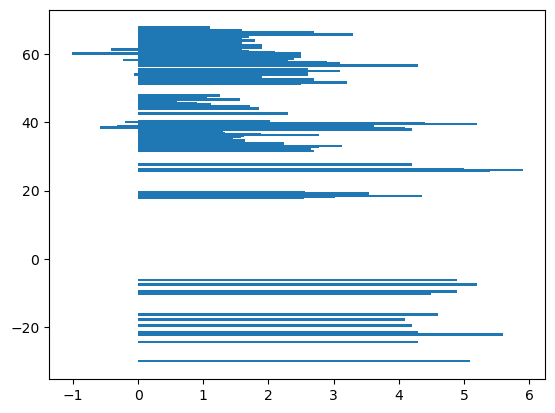

In [37]:
plt.barh(latitude,mag)

In [15]:
plt.barh(longitude,depth)

<BarContainer object of 1 artists>

<BarContainer object of 316 artists>

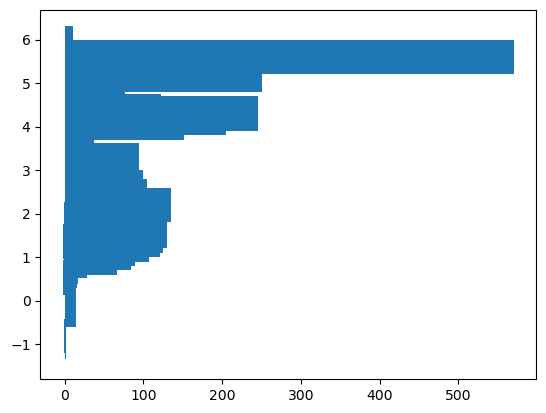

In [44]:
plt.barh(mag,depth)


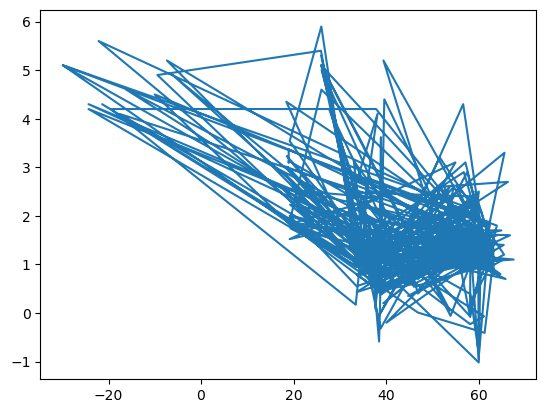

In [41]:
plt.plot(latitude,mag)
plt.show()

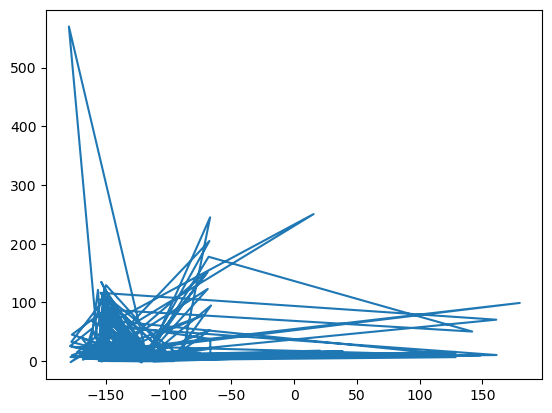

In [42]:
plt.plot(longitude,depth)
plt.show()

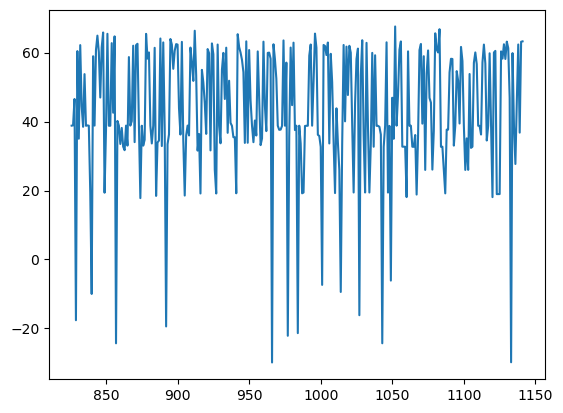

In [45]:
plt.plot(latitude)

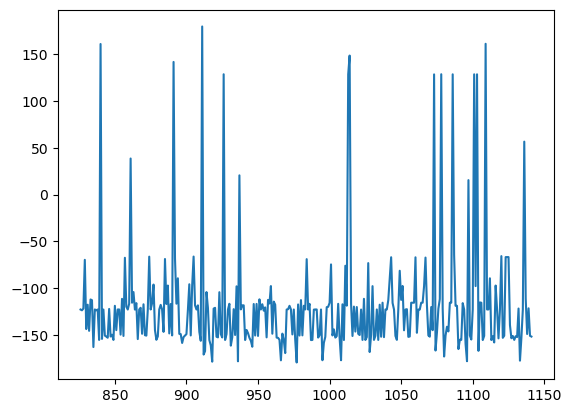

In [46]:
plt.plot(longitude)

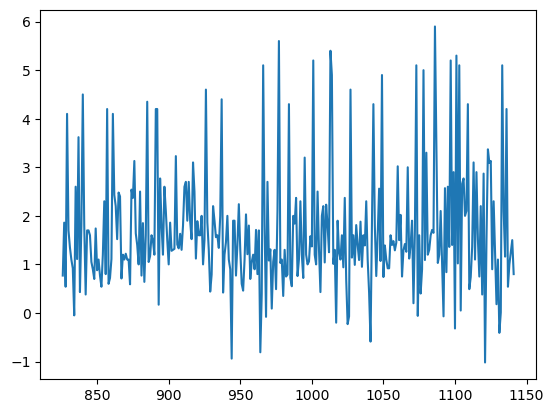

In [47]:
plt.plot(mag)

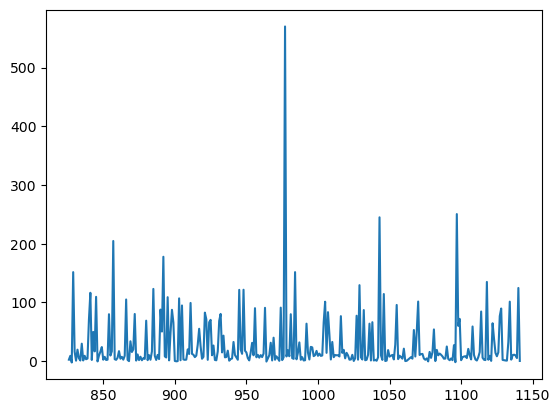

In [48]:
plt.plot(depth)

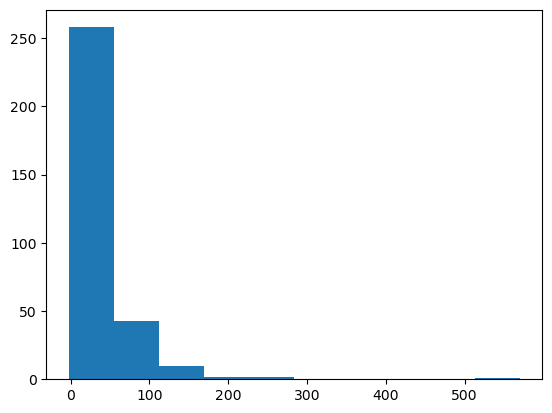

In [54]:
plt.hist(depth)
plt.show()

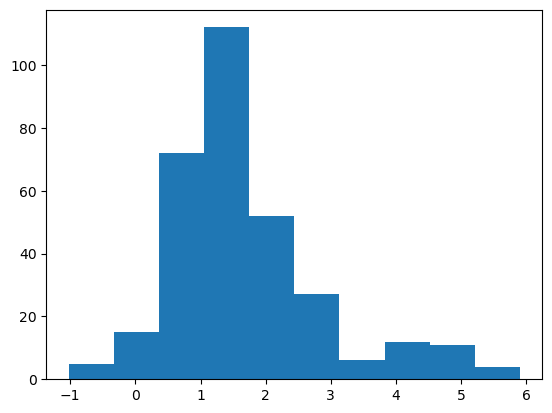

In [55]:
plt.hist(mag)
plt.show()

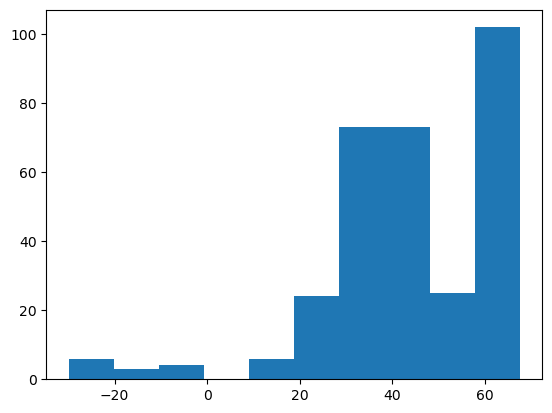

In [56]:
plt.hist(latitude)
plt.show()

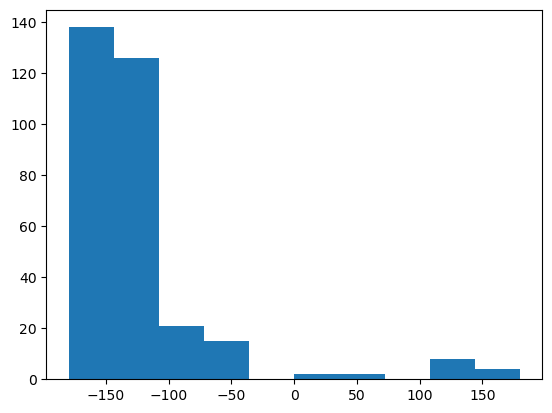

In [57]:
plt.hist(longitude)
plt.show()

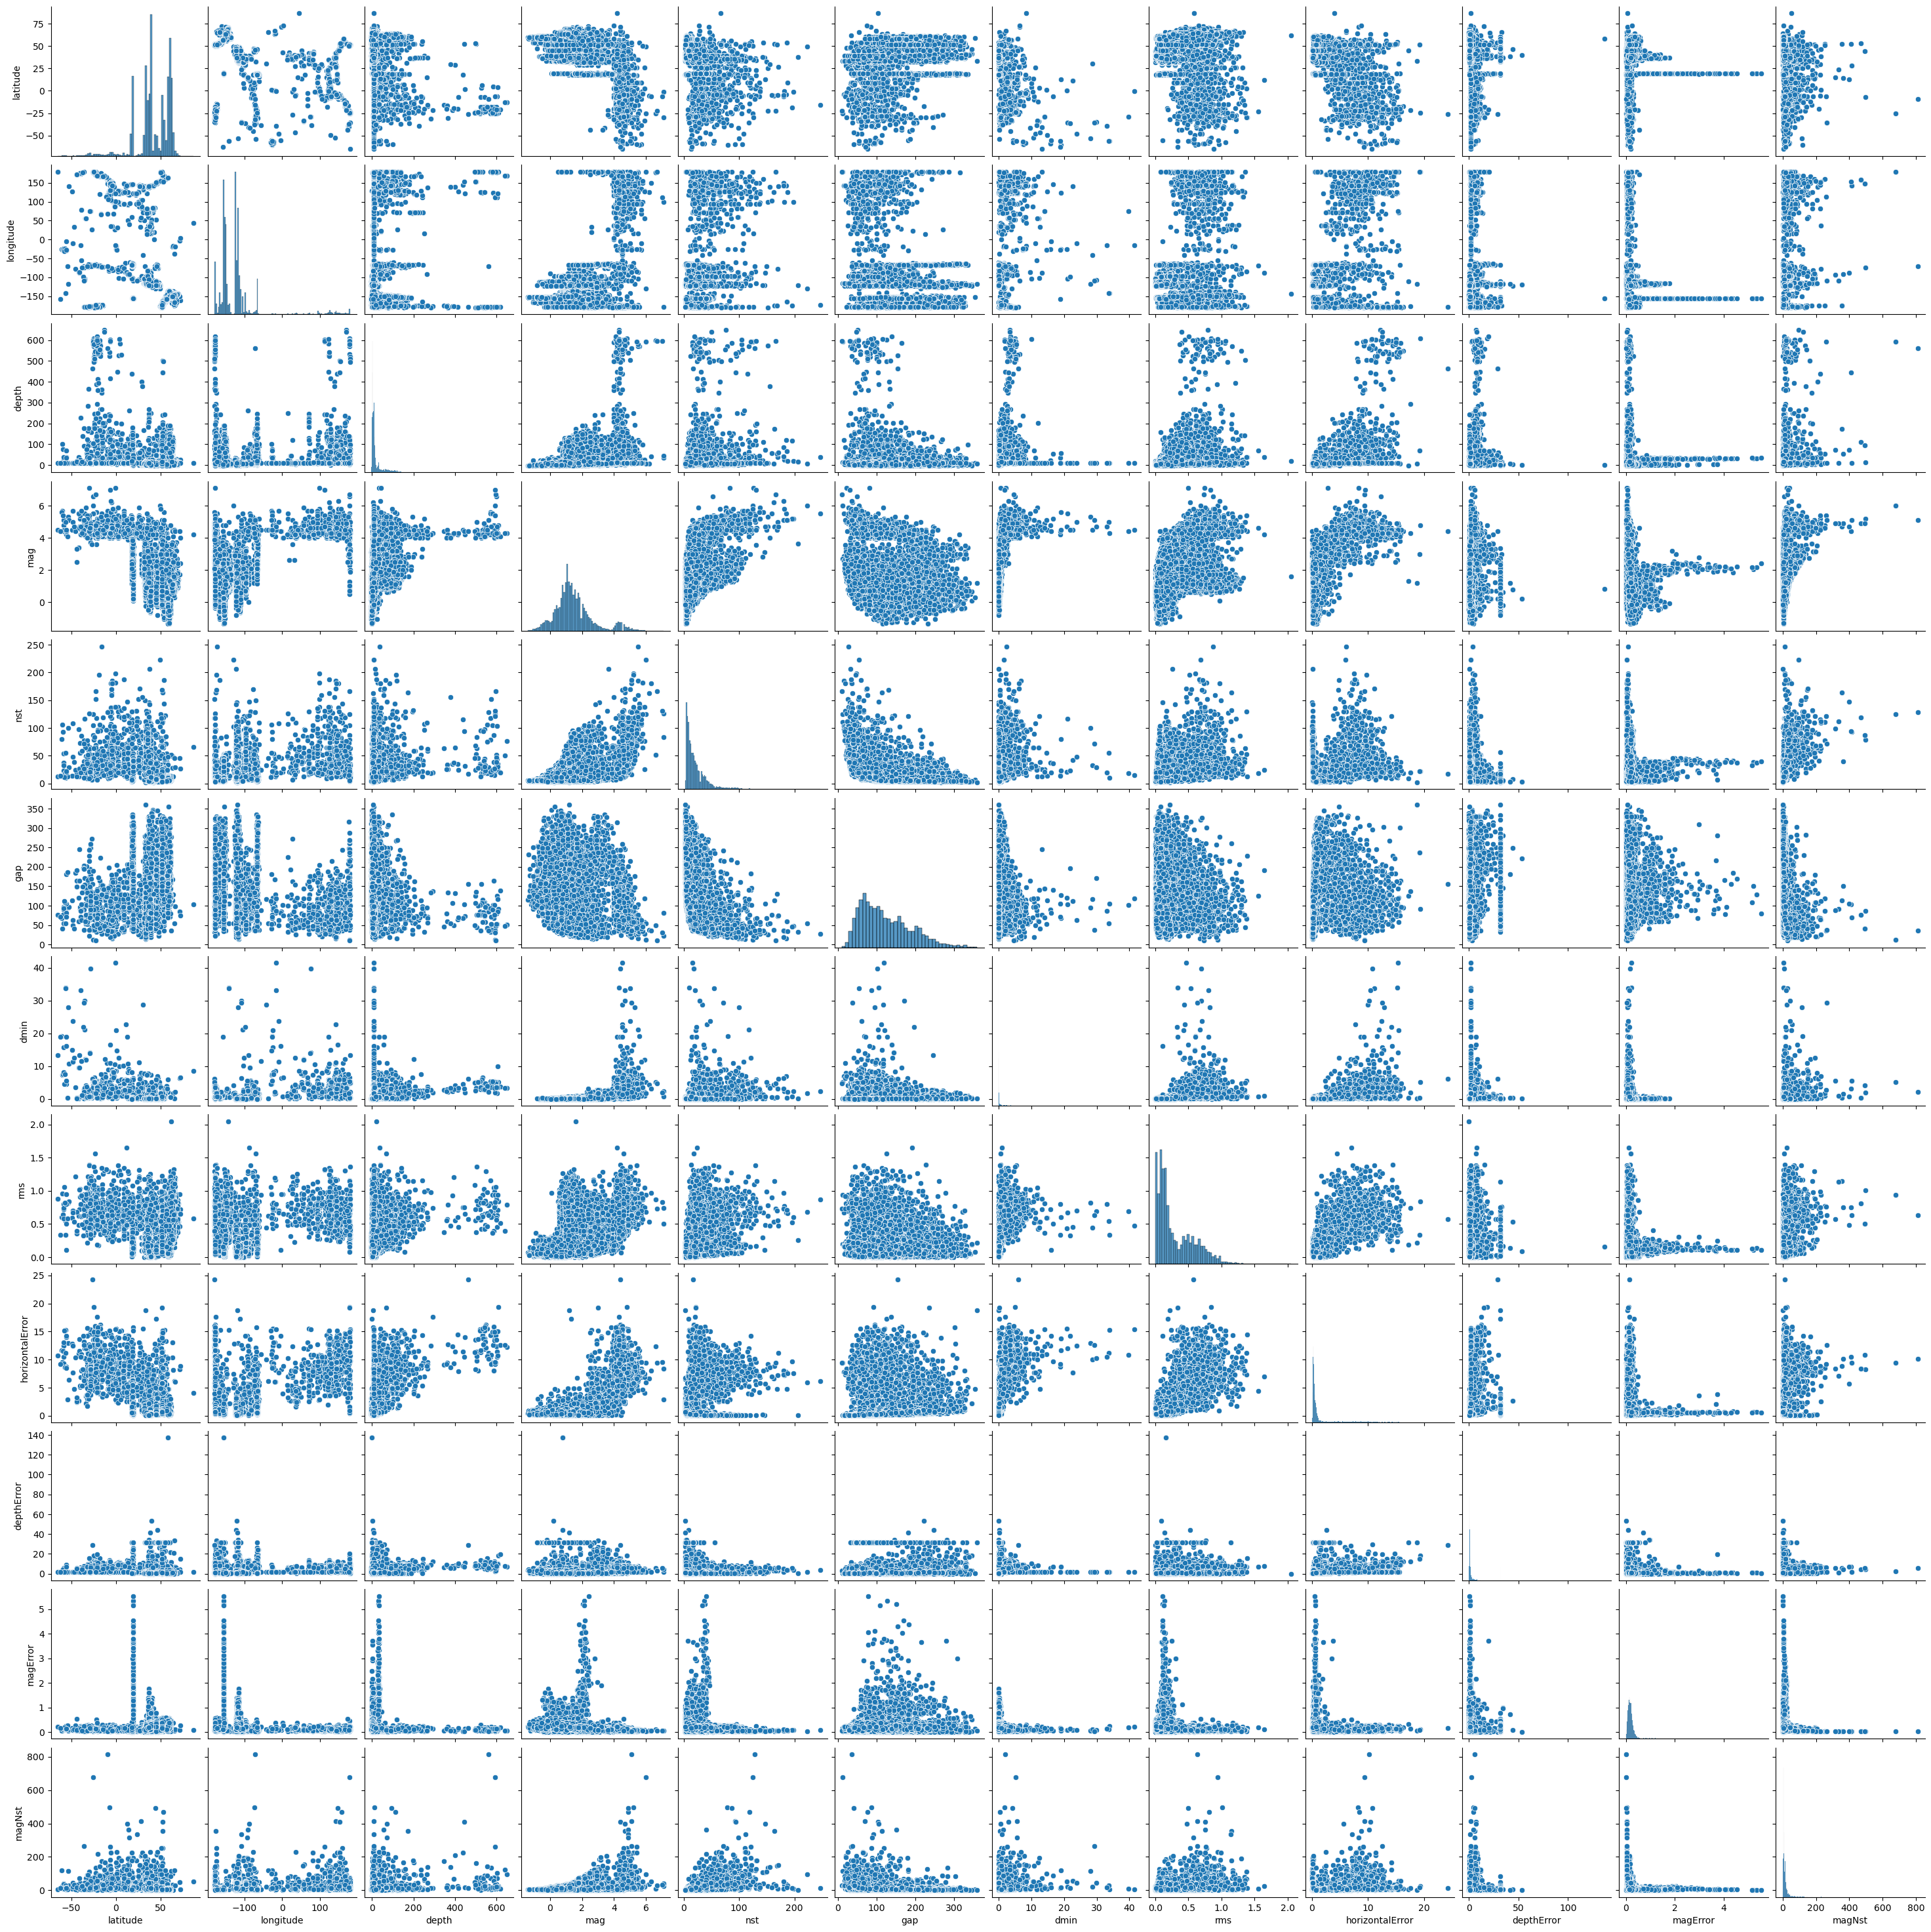

In [3]:
sns.pairplot(data)

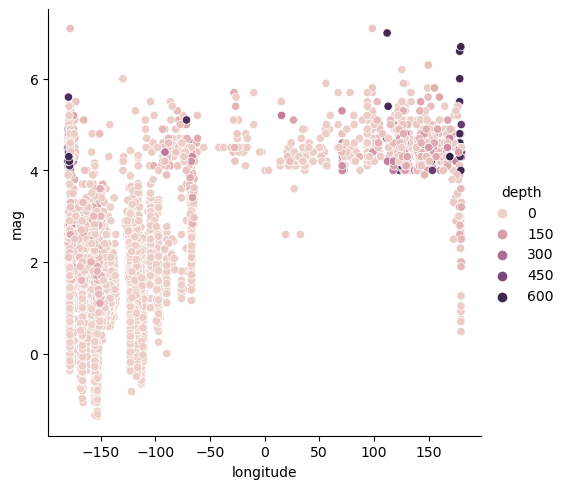

In [3]:
sns.relplot(x='longitude',y='mag',hue='depth',data=data)

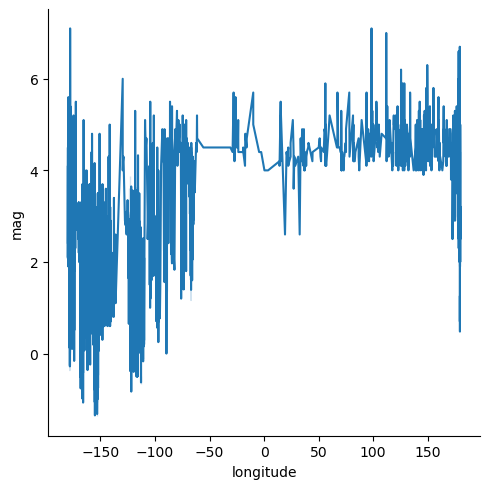

In [2]:
sns.relplot(x = 'longitude',y = 'mag',kind = 'line',data = data)

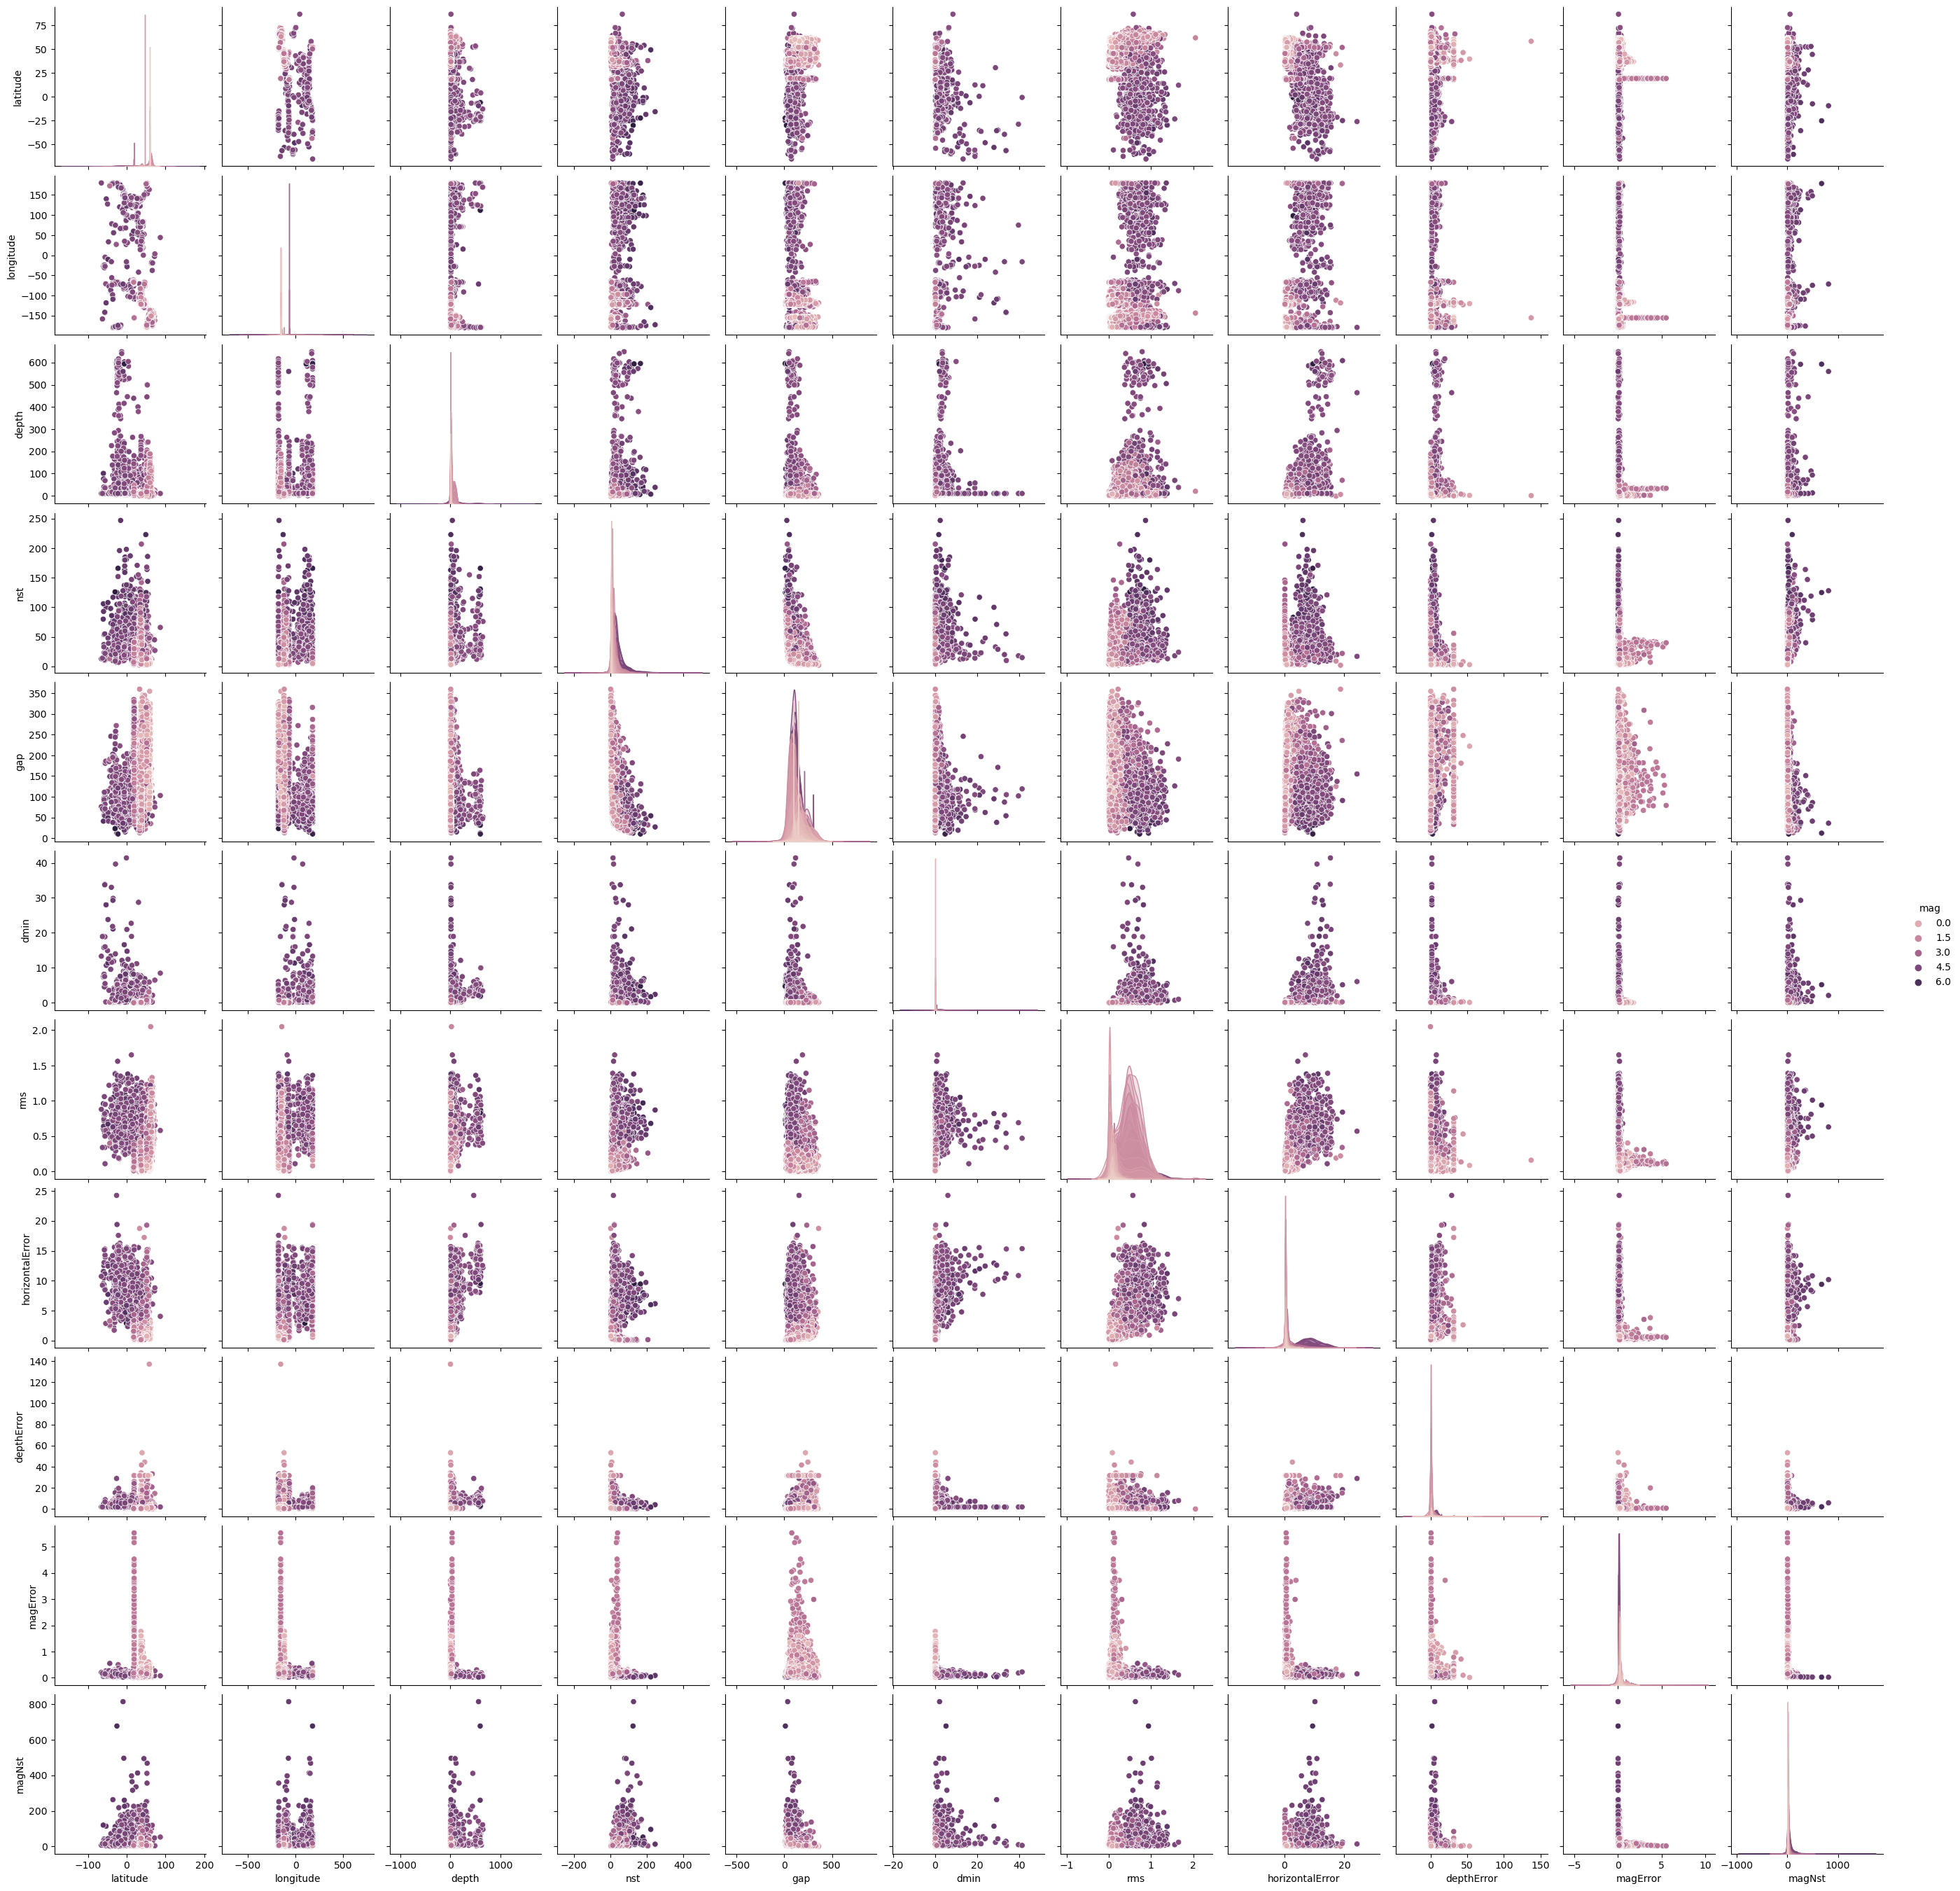

In [2]:
sns.pairplot(data=data, hue='mag')
plt.show()

C:\Users\JIBIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


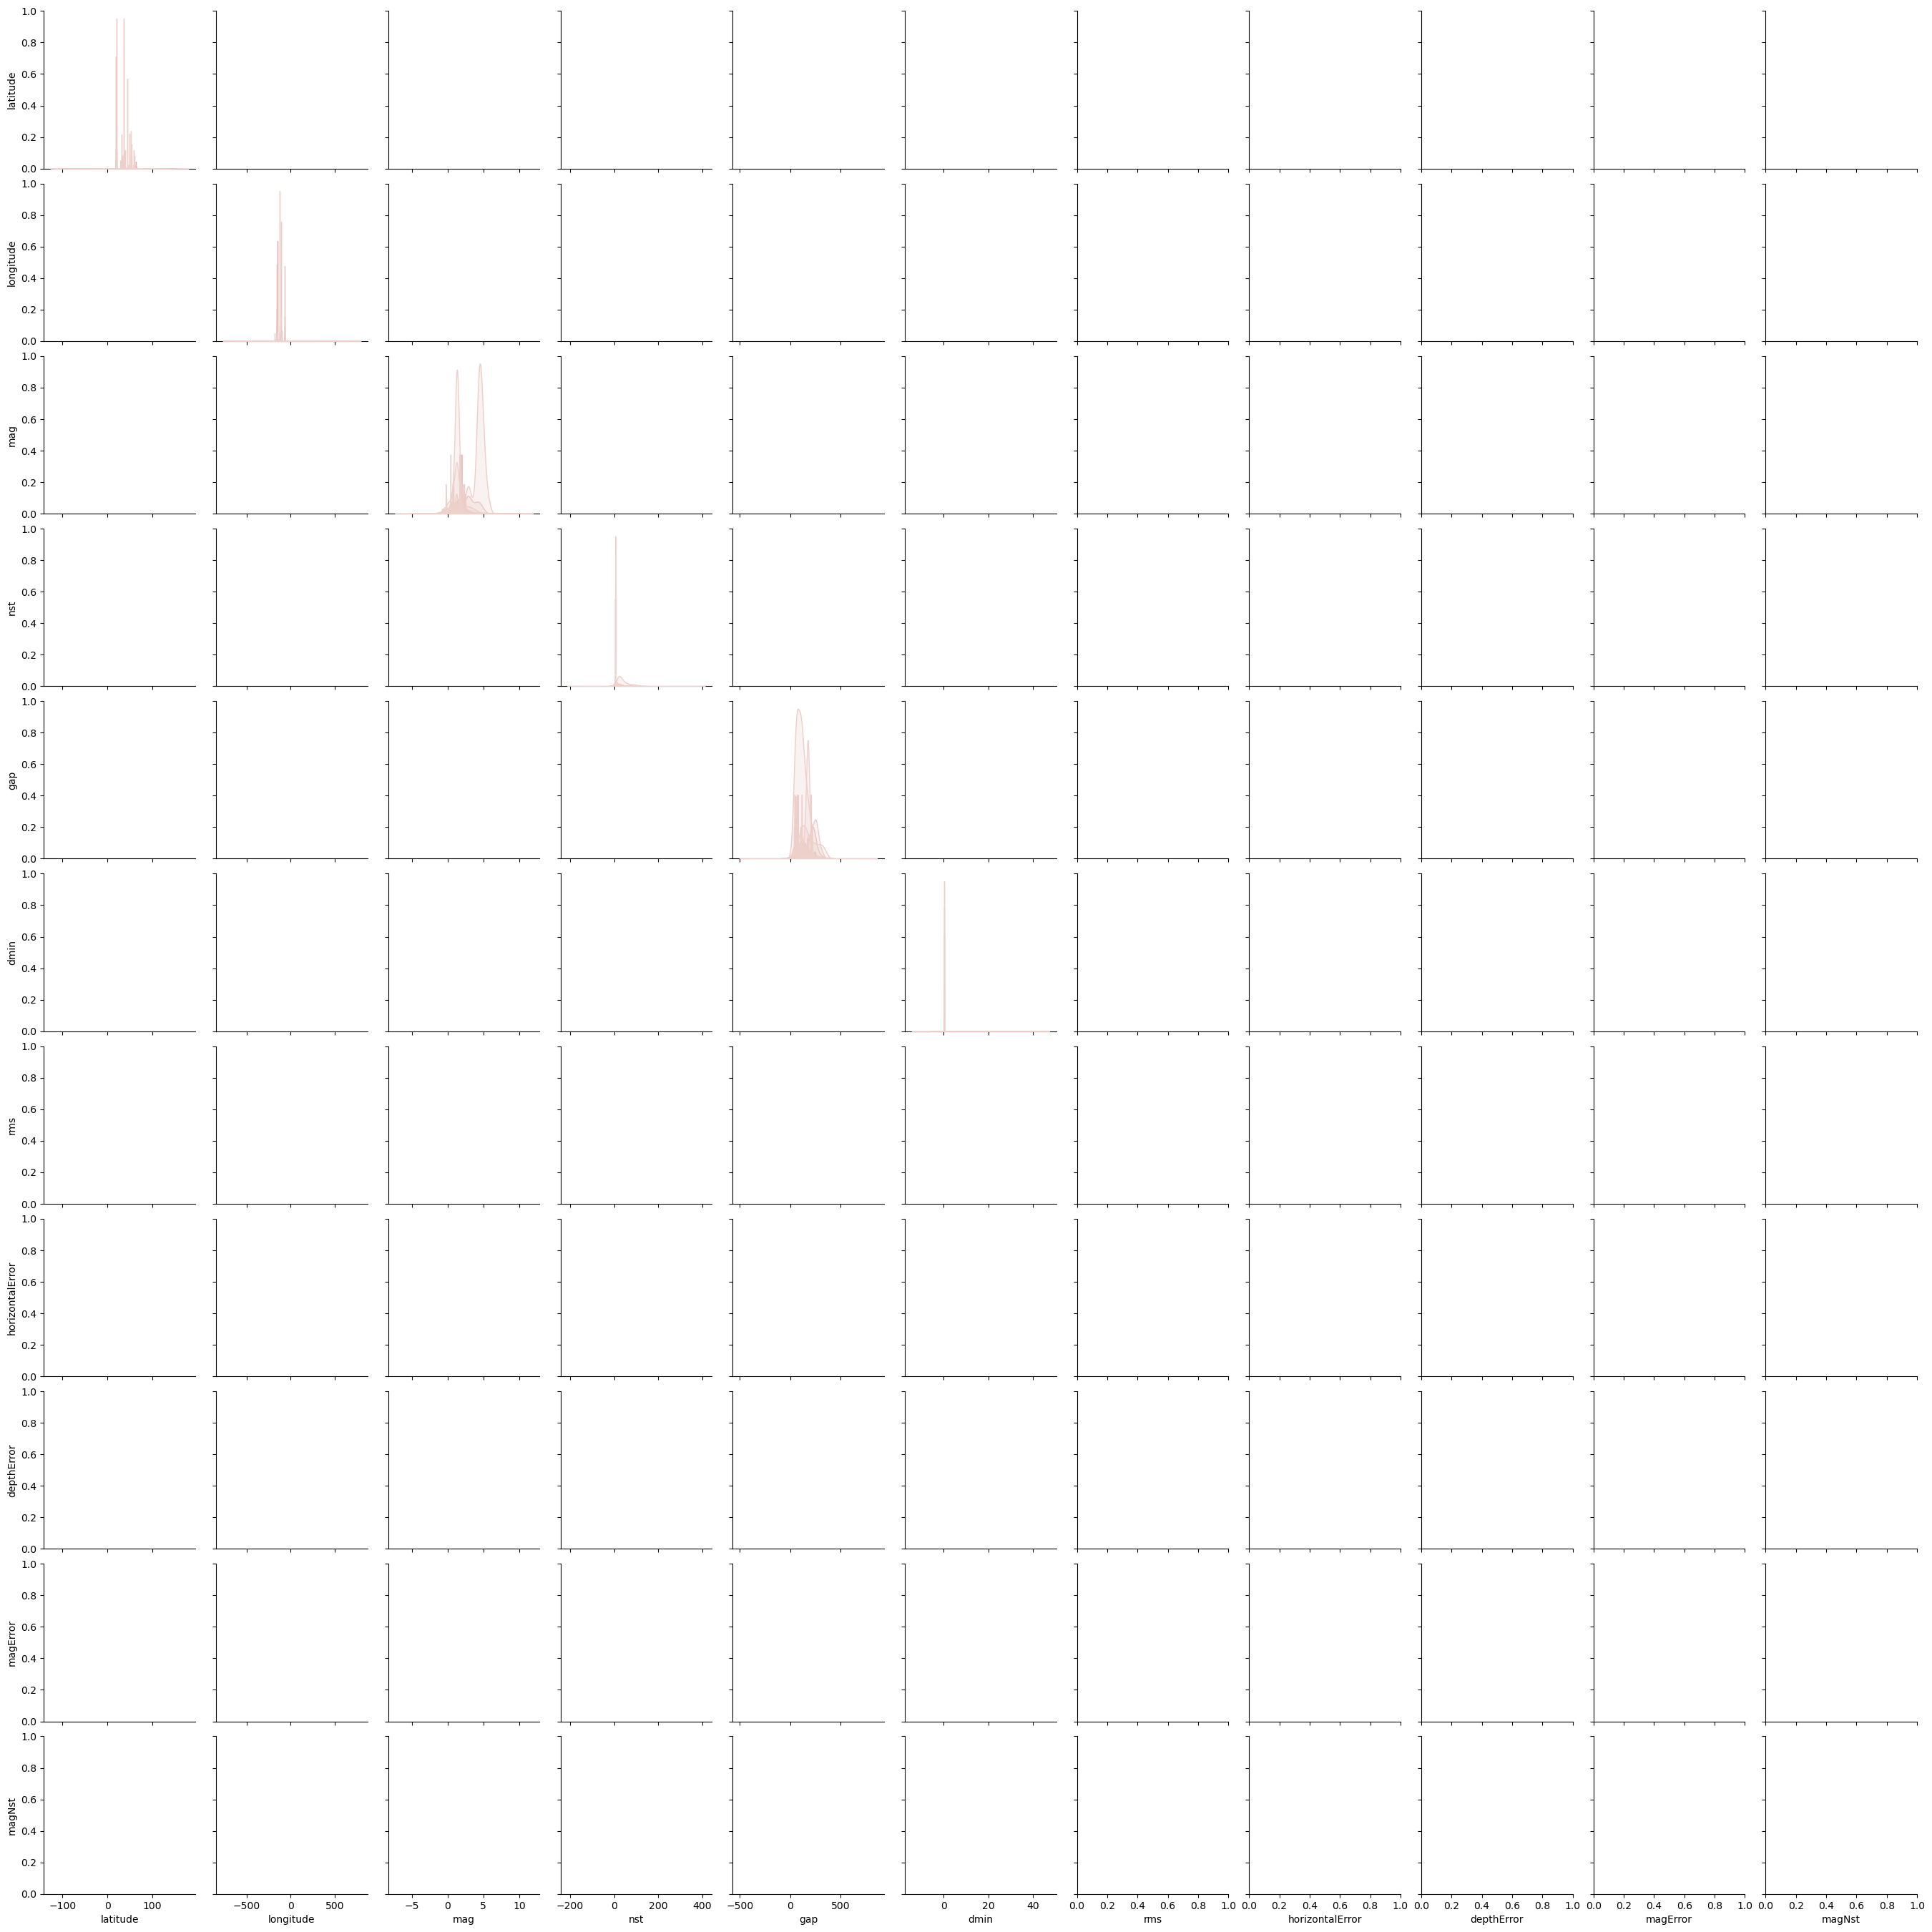

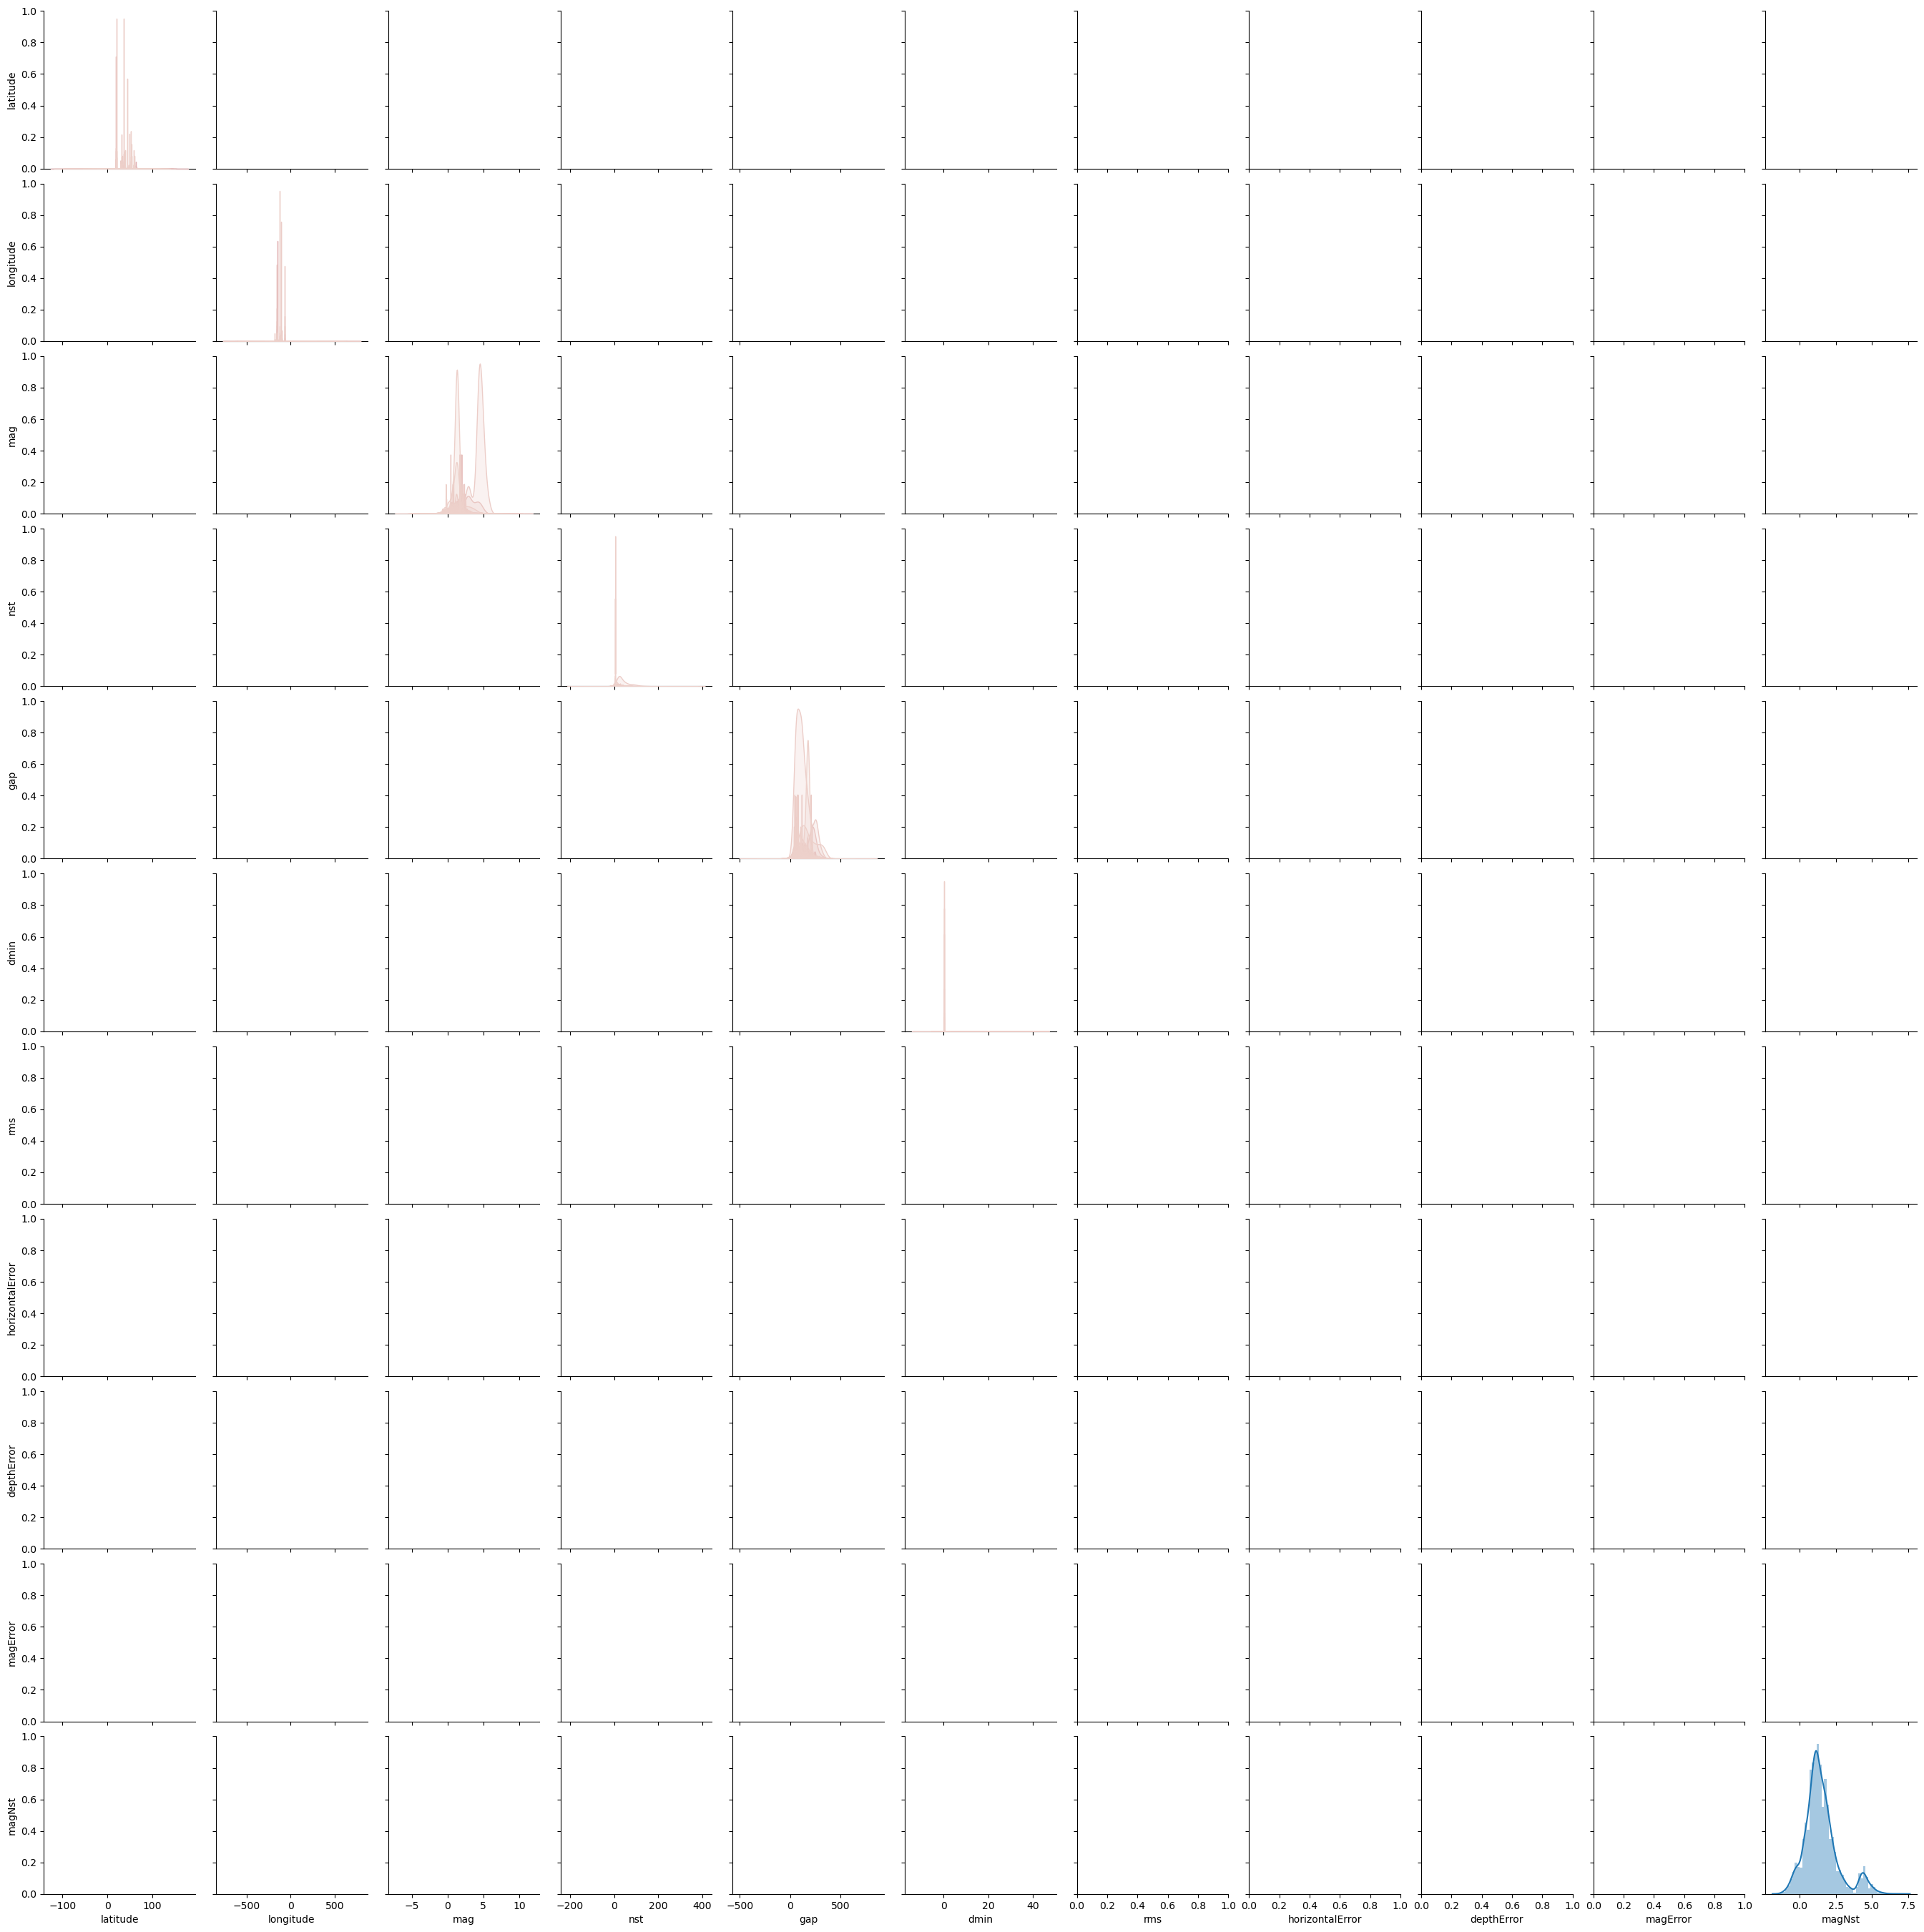

In [5]:
sns.displot(data['mag'])
plt.show()

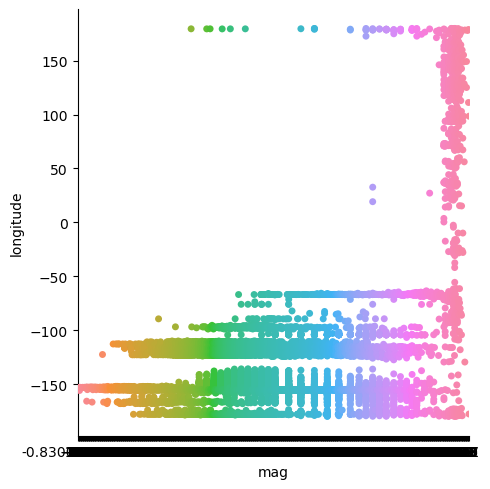

In [6]:
sns.catplot(x='mag', y='longitude', data=data)
plt.show()

C:\Users\JIBIN\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


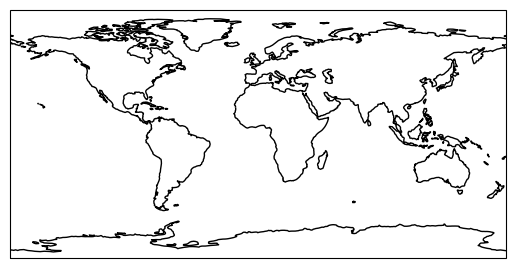

In [21]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines(resolution='110m')

plt.show()


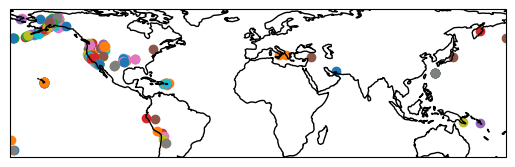

In [22]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines(resolution='110m')
for i in range(len(mag)):
    plt.scatter(lons[i],lats[i])
plt.show()